### Adaboost 
#### (many Stumps+ voting (DT with max depth of 1 and leaf node of 2)

### Change your y to be (-1,1)!!!!!!!!!!!!!!!

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

In [67]:
from sklearn.datasets import make_blobs

# X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X, y = make_classification(n_samples=500, n_features = 20,random_state=1) #make_classification n_features = 20
print(y)
y = np.where(y==0,-1,1)  #change our y to be -1 if it is 0, otherwise 1
print(y)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

[1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 

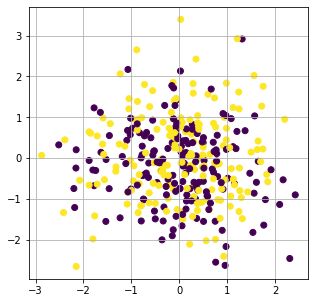

In [68]:
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [69]:
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        #Voting power of the stump
        self.alpha = None

class AdaBoost():
    def __init__(self,S=S,eta = 0.5):
        self.S = S
        self.eta = eta
        
    def fit(self,X,y):
        m,n = X.shape
        print('X shape: ',X.shape)
        print('y shape: ',y.shape)
        
        W = np.full(m,1/m)
        
        self.clfs = []
        
        for _ in range(self.S):
            clf = DecisionStump() # number of stumps
            
            # set initially minimum error to infinity
            # so at least the first stump is identified
            min_err = np.inf
            
            #previously we don't need to do this
            #since sklearn does it
            #but now we have to loop all features, all thresholds
            #and all polarities to find the minimum weighted errors
            for feature in range(n):
#                 print('feature: ',feature)
                feature_vals = np.sort(np.unique(X[:,feature]))
                thresholds = (feature_vals[:-1]+feature_vals[1:])/2
                for threshold in thresholds:
                    for polarity in [1,-1]: # whats the point of having both [1,-1]??
#                         print('polarity',polarity)
                        yhat = np.ones(len(y))
                        yhat[polarity * X[:,feature] < polarity * threshold] = -1 #polarity = 1 rule
#                         print('y',y)
#                         print('yhat',yhat)
                        err = W[(yhat != y)].sum() #[0,1]
#                         print('err',err)
                        
                        #save the best stump
                        if err < min_err:
#                             print('err',err)
#                             print('min_err',min_err)
                            clf.polarity  = polarity
                            clf.threshold = threshold
                            clf.feature_index = feature
                            min_err = err
#                 print('='*30)
#                 print('polarity',clf.polarity)
#                 print('threshold',clf.threshold)
#                 print('feature_index',clf.feature_index)
#                 print('min_err', err)
                            
        #Once we know which is the best stump
        # we calculate its alpha and rewieght samples
        eps = 1e-10 
        '''
        to prevent division by zero
        as for alpha = 0.5*(ln((1-err)/err)) #sklearn default = 0.5
        '''
        clf.alpha = self.eta*(np.log((1-err)/(err + eps)))
        W = W * np.exp(-clf.alpha * y * yhat) #[-1,1]
        '''
        If classified incorrectly: 1
        otherwise, -1
        Therefore, if y == yhat 1*1  = -1*-1 = 1  so *-1 = -1
                so if y != yhat 1*-1 = -1 *1 = -1 so *-1 = 1           
        '''
        W = W/sum(W)
        
        #save clf
        self.clfs.append(clf)
    
    def predict(self,X):
        m,n = X.shape
        yhat = np.zeros(m)
        for clf in self.clfs:
            pred = np.ones(m) #set all to ones
            pred[clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold] = -1 
            yhat += clf.alpha*pred
        return np.sign(yhat)               
        

In [70]:
model = AdaBoost(S=10)
model.fit(X_train,y_train)
yhat = model.predict(X_test)
print(classification_report(y_test,yhat))

X shape:  (350, 20)
y shape:  (350,)
              precision    recall  f1-score   support

          -1       0.94      0.95      0.94        79
           1       0.94      0.93      0.94        71

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



X shape:  (350, 2)
y shape:  (350,)
(200, 200)
(200, 200)


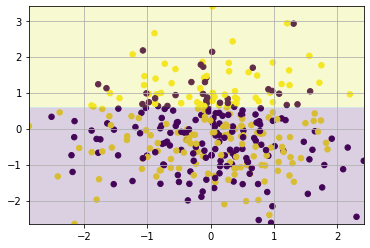

In [71]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier().fit(X, y)

def plot_tree(model, X, y):
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:,0]), num=200),
                             np.linspace(np.min(X[:,1]), np.max(X[:,1]), num=200))
    print(xx.shape)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    print(Z.shape)
    # Create a color plot with the results
    n_classes = len(set(y))
    contours = plt.contourf(xx, yy, Z, alpha=0.2)

model = AdaBoost(S=10)
model.fit(X_train[:,:2],y_train)
yhat = model.predict(X_test[:,:2])

plot_tree(model, X_train[:,:2], y_train)

# plot_tree(model, X, y)

In [72]:
from sklearn.ensemble import AdaBoostClassifier

#SAMME.R - a variant of SAMME which relies on class probabilities 
#rather than predictions and generally performs better
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print("Ada score: ", accuracy_score(y_test, y_pred))

Ada score:  0.9666666666666667
